In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from sklearn.metrics import classification_report, roc_curve, auc, precision_score, f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve

#Data preparation
from imblearn.over_sampling import SMOTE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.inspection import permutation_importance

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.svm import OneClassSVM

from scipy.stats import pearsonr

from sklearn.decomposition import PCA

import pickle

In [2]:
%matplotlib inline

In [3]:
np.random.seed(11)

# <center>Cap Busters</center>
<center>By Denis Zahariev</center>

Download this notebook from: https://github.com/DeniBademi/Cap-Busters

<br>
<br>
<center style="font-size: 22px"><strong>Abstract</strong></center>
<br>
<center>Fraud entails deception in order to obtain illegal gains. Thus, it is mainly evidenced within financial institutions and is a matter of general interest. The problem is particularly complex, since perpetrators of fraud could belong to any position, from top managers to payroll employees. When we talk about security in digital life the main challenge is to find the abnormal activity, as fraudsters are increasing day by day. Fraud detection has traditionally been performed by auditors, who mainly employ manual techniques. These could take too long to process fraud-related evidence and are bound to become insufficient in the ever-growing digitalization of what not. Data mining, machine learning, and, as of recently, deep learning strategies are being used to automate this type of processing. In this notebook, we are going to tackle this problem by using a variety of algoritms.
    
    
</center>

### Table of contents:
1. [Introduction](#Introduction)
    1. [Types of internet fraud](#Types_of_internet_fraud)
        1. [Credit card scams](#Credit_card_scams)
        2. [Email scams](#Email_scams)
    1. [Dealing with problems](#Dealing_with_problems)
        1. [Imbalanced datasets](#Imbalanced_datasets)
        2. [Missing values](#Missing_values)
<br>
<br>

2. [Exploring our data](#Exploring_our_data)
    1. [Exploring the Financial Fraud dataset](#Exploring_the_FF_dataset)
        1. [Reading the dataset](#Reading_the_dataset_ff)
        2. [Data tidying and cleaning](#Data_tidying_and_cleaning_ff)
        3. [Feature engineering](#Feature_engineering_ff)
        4. [Applying SMOTE](#Applying_SMOTE)
        
    2. [Exploring the IEEE Comp Dataset](#Exploring_the_IEEE_Comp_dataset)
        1. [Reading the dataset](#Reading_the_dataset_ieee)
        2. [Data tidying and cleaning](#Reading_the_dataset_ieee)
<br>
<br>
3. [Financial Fraud modeling](#Financial_Fraud_modeling)
    1. [Setting a baseline](#Setting_a_baseline_ff)
        1. [Logistic Regression](#Logistic_Regression)
        2. [Evaluating accuracy](#Evaluating_accuracy_lr)
        3. [Evaluating performance](#Evaluating_performance_lr)
    2. [Tuning](#Tuning_ff)
        1. [Tuning Logistic Regression](#Logistic_Regression_tuning")
        2. [XGBooost Classifier](#XGBoost_Classifier")
        3. [Random Forest Classifier](#Random_Forest_Classifier_ff")
    3. [Comparison](#Comparison_FF)
<br>
<br>   
4. [IEEE Comp modeling](#IEEE_Comp_modeling)
    1. [Setting a baseline](#Setting_a_baseline_ieee)
        1. [Logistic Regression](#Logistic_Regression)
        2. [Evaluation](#Evaluation_ieee)
           1. [Learning curves](#Learning_curves)
    2. [Dimensionality reduction](#Dimensionality_reduction)
        1. [PCA](#PCA)
        2. [LinDA](#LinDA)
    3. [Tuning](#Tuning_ieee)
        1. [Fraud as anomay](#Fraud_as_anomaly)
        2. [Random Forest Classifier](#Random_Forest_Classifier_ieee)
    4. [Comparison](#Comparison_ieee)
<br>
<br> 
5. [Conclusion and future work](#Conclusion_and_future_work)
   

# <div class="alert alert-block alert-danger">1. Introduction </div> <a class="anchor" id="Introduction"></a>

In this notebook we will fight criminals. In recent times cybersecurity became a growing concern. For us, it is vital to address it to ensure everyone's safety online.
<br>
Internet crime schemes steal millions of dollars each year from victims and continue to plague the Internet through various methods. Several high-profile methods include the following:

* __Phishing/Spoofing__ - The use of email and online messaging services to dupe victims into sharing personal data, login credentials, and financial details.
<br><br>
* __Data breach__ - Stealing confidential, protected, or sensitive data from a secure location and moving it into an untrusted environment. This includes data being stolen from users and organizations.
<br><br>
* __Denial of service (DoS)__ - Interrupting access of traffic to an online service, system, or network to cause malicious intent.
<br><br>
* __Malware and Ransomware__ - Malicious software that attempts to either steal valuable data from a user's computer or prevent said user's access to that data and then demanding payment.

While detecting the last method may be a topic for another notebook, usually we are able to prevent most of them if we know how to spot hackers' attacks and attempts.

## 1.A Types of internet fraud <a class="anchor" id="Types_of_internet_fraud"></a>

### 1.A.a Credit card scams <a class="anchor" id="Credit_card_scams"></a>

Credit card fraud typically occurs when hackers fraudulently acquire people's credit or debit card details in an attempt to steal money or make purchases. 

To obtain these details, internet fraudsters often use too-good-to-be-true credit card or bank loan deals to lure victims. For example, a victim might receive a message from their bank telling them they are eligible for a special loan deal or a vast amount of money has been made available to them as a loan. These scams continue to trick people despite widespread awareness that such offers are too good to be true for a reason.

### 1.A.b Email scams <a class="anchor" id="Email_scams"></a>

This category unites several subtypes:

__Lottery Fee Fraud__
<br>
A common form of email scam that tell victims they have won the lottery. These scams will inform recipients that they can only claim their prize after they have paid a small fee.

Lottery fee fraudsters typically craft emails to look and sound believable, which still results in many people falling for the scam. The scam targets people's dreams of winning massive amounts of money, even though they may have never purchased a lottery ticket. Furthermore, no legitimate lottery scheme will ask winners to pay to claim their prize. 
<br>

__The Nigerian Prince__
<br>
A classic internet fraud tactic, the Nigerian Prince scam approach remains common and thriving despite widespread awareness.

The scam uses the premise of a wealthy Nigerian family or individual who wants to share their wealth in return for assistance in accessing their inheritance. It uses phishing tactics to send emails that outline an emotional backstory, then lures victims into a promise of significant financial reward. The scam typically begins by asking for a small fee to help with legal processes and paperwork with the promise of a large sum of money further down the line. 

The scammer will inevitably ask for more extensive fees to cover further administration tasks and transaction costs supported by legitimate-looking confirmation documents. However, the promised return on investment never arrives.
<br>

__Greeting Card Scams__
<br>
Many internet fraud attacks focus on popular events to scam the people that celebrate them. This includes birthdays, Christmas, and Easter, which are commonly marked by sharing greeting cards with friends and family members via email. Hackers typically exploit this by installing malicious software within an email greeting card, which downloads and installs onto the recipient’s device when they open the greeting card.

A terrifying result of that would be the victim’s personal and financial data being stolen and their computer being used as a bot within a vast network of compromised computers, also known as a botnet.
<br>

__Email Phishing Scams__
<br>
The attack aims to encourage people to click on a link that leads to a malicious or spoofed website designed to look like a legitimate website, or open an attachment that contains malicious content.

Statistics from Security Boulevard show that in 2020, 22% of all data breaches involved a phishing attack, and 95% of all attacks that targeted business networks were caused by spear phishing. Furthermore, 97% of users could not spot a sophisticated phishing email, 1.5 million new phishing sites were created every month, and 78% of users understand the risk of hyperlinks in emails but click them anyway.

## 1.B Dealing with problems <a class="anchor" id="Dealing_with_problems"></a>

Now that we know our enemy better we can start working. We will address the 2 main types of scams that we just explained.

### 1.B.a Imbalanced datasets <a class="anchor" id="Imbalanced_datasets"></a>

Because of the nature of these tasks, we can expect imbalanced datasets. The majority of emails and credit card transactions are indeed valid, which makes our task of distinguishing fraud harder. 3 solutions exist to that problem.

__Random Oversampling (ROS)__:
One way to solve the problem of imbalanced data is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

__Random Undersampling (RUS)__:
If there is a lot of data and many minority cases, then undersampling may be computationally more convenient. In most cases, throwing away data is not desirable.

#### What is SMOTE?


Perhaps the most widely used approach to synthesizing new examples is called the __Synthetic Minority Oversampling TEchnique__, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

To show visually what it does, here is presented the SMOTE process:
<br><br>
<img src="https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/fraud_detection/smote.JPG" alt="SMOTE">

### 1.B.b Missing values <a class="anchor" id="Missing_values"></a>

Real-world data would certainly have missing values. This could be due to many reasons such as data entry errors or data collection problems. Irrespective of the reasons, it is important to handle missing data because any statistical results based on a dataset with non-random missing values could be biased. Also, many ML algorithms do not support data with missing values.

<u>__Types__</u>:
<br>
There are 3 types of missing data:

__MCAR__: Missing Completely At Random. It is the highest level of randomness. This means that the missing values in any features are not dependent on any other features values. This is the desirable scenario in case of missing data.

__MAR__: Missing At Random. This means that the missing values in any feature are dependent on the values of other features.

__MNAR__: Missing Not At Random. Missing not at random data is a more serious issue and in this case, it might be wise to check the data gathering process further and try to understand why the information is missing.

<u>__How we deal with them__</u>:
<br>
1. __Ignoring__ - When the number of complete observations is sufficient, we can generally ignore the missing data. That is, if they are MCAR.
<br>
2. __Dropping__ - If the data is MCAR or MAR and the number of missing values in a feature is very high, then that feature should be left out of the analysis. 
<br>
3. __Deletion__ - Cases which have missing values for one or more features are deleted. If the cases having missing values are small in number, it is better to drop them. This is a very easy approach but may cause harm if this leads to a significant decrease in sample size.
<br>
4. __Imputation__ - Imputation is the process of substituting the missing data by some statistical methods. It is useful in the sense that it preserves all cases by replacing missing data with an estimated value based on other available information. Said statistical methods are often column mean/mode/median value. However, these approaches reduce the variance in that feature.
<br>
Other, more sophisticated imputation methods methods include regressions, KNN Imputation and multiple imputation. 
<br>
<br>

With __regressions__, the missing values are treated as dependent ones and complete observations are taken as independent variables. With them, we fit a linear regression and make predictions for the ones we have to impute. The disadvantage of this method is the bold assumption we make: "The missing variable has a linear correlation with the independent one."
<br>
<br>

Using __KNN__ algorithms, the _k_-neighbours are chosen using some distance measure and their average is used as an imputation estimate. This could be used for estimating both qualitative attributes (the most frequent value among the _k_ nearest neighbours) and quantitative attributes (the mean of the _k_ nearest neighbours).
<br>
<br>
Multiple imputations is an iterative method in which multiple values are estimated for the missing data points using the distribution of the observed data. The advantage of this method is that it reflects the uncertainty around the true value and returns unbiased estimates.

MI involves the following three basic steps:

1. __Imputation__: The missing data are filled in with estimated values and a complete data set is created. This process of imputation is repeated _m_ times and _m_ datasets are created.
2. __Analysis__: Each of the _m_ complete data sets is then analysed using a statistical method of interest (e.g. linear regression).
3. __Pooling__: The parameter estimates (e.g. coefficients and standard errors) obtained from each analysed data set are then averaged to get a single point estimate.

#### What is MICE?

__Multiple Imputation by Chained Equations__ (MICE) is a multiple imputation method used to replace missing data values in a dataset under certain assumptions about the data missingness mechanism (e.g., the data are missing at random, the data are missing completely at random).
<br>
<br>
If we have a dataset which includes missing values in one or more of its variables, you can create multiple copies of this dataset - for example, we can create 5 copies of the original data set - and replace the missing data values in each copy using the MICE procedure. 
<br>
<br>

<img src="https://www.researchgate.net/profile/Linda-Ejlskov-2/publication/316789124/figure/fig1/AS:492091533991937@1494335172991/The-MICE-process-Rubin-1987.png" alt="MICE Process"></img>

# <div class="alert alert-block alert-danger">2. Exploring our data </div> <a class="anchor" id="Exploring_our_data"></a>

## 2.A Exploring the Financial Fraud dataset <a class="anchor" id="Exploring_the_FF_dataset"></a>

There is a lack of publicly available datasets on financial services. That is because of the intrinsically private nature of financial transactions, which leads to no publicly available datasets. There is a credit card fraud dataset on kaggle here(link), but it has already been transformed with PCA.
<br>
<br>
For this reason, I decided to bite the bullet and use a synthetic dataset from PaySim. Nevertheless it is based on real data, it is just aggregated.

### 2.A.a Reading the dataset <a class="anchor" id="Reading_the_dataset_ff"></a>

In [4]:
financial_data_raw = pd.read_csv("data/financial_data.csv")
financial_data_raw.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


* __step__ - maps a unit of time in the real world. 1 = 1 hour of time. Total steps 744 (30 days simulation).
* __type__ - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
* __amount__ - amount of the transaction in local currency.
* __nameOrig__ - customer who started the transaction
* __oldbalanceOrg__ - initial balance before the transaction
* __newbalanceOrig__ - new balance after the transaction
* __nameDest__ - customer who is the recipient of the transaction
* __oldbalanceDest__ - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
* __newbalanceDest__ - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
* __isFraud__ - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
* __isFlaggedFraud__ - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

Lets see what we are working with:

In [5]:
financial_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
len(financial_data_raw)

6362620

In [7]:
financial_data_raw[financial_data_raw.isna().any(axis=1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [8]:
financial_data_raw.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


From what we see it is heavily imbalanced. Lets see an actual percentage of records marked as fraud:

In [9]:
financial_isFraud_counts = np.array(financial_data_raw['isFraud'].value_counts().to_list())
(financial_isFraud_counts[1]/financial_isFraud_counts.sum() * 100).round(2)

0.13

### 2.A.b Data tidying and cleaning <a class="anchor" id="Data_tidying_and_cleaning_ff"></a> 

The last column of the dataset gives us a guess of another system regarding if a record is fraud or not. How good is it?

In [238]:
def plot_conf_matrix(y_true, y_predicted, cmap=plt.cm.Reds):
    """
    Plots confusion matrix based on y_true and y_predicted. 
    You can use a cmap of choice to set the matrix theme.
    y_true: True values
    y_predicted: Predicted values
    cmap: matplotlib cmap. default=plt.cm.Reds
    Example:
    plot_conf_matrix(y_true, y_predicted, plt.cm.Reds)
    """
    conf_matrix = confusion_matrix(y_true, y_predicted)

    fig, ax = plt.subplots(figsize=(3.5, 3.5))
    ax.matshow(conf_matrix, cmap=cmap, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    plt.xticks([0,1], ["False", "True"])
    plt.yticks([0,1], ["False", "True"], )
    plt.xlabel('Predictions', fontsize=12)
    plt.ylabel('Actuals', fontsize=12)
    plt.title('Confusion Matrix', fontsize=12)
    plt.show()

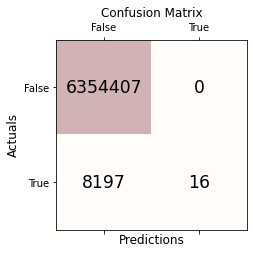

In [11]:
plot_conf_matrix(financial_data_raw['isFraud'], financial_data_raw["isFlaggedFraud"], plt.cm.Reds)

Not very much. It is missing a lot of actual frauds but fortunately it is not giving true negatives. This is not a sufficient feature and we can remove it from the dataset.

In [12]:
financial_data = financial_data_raw.drop(columns=["isFlaggedFraud"], axis = 1)
financial_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


Lets see how frauds are distributed between the different types of transactions.

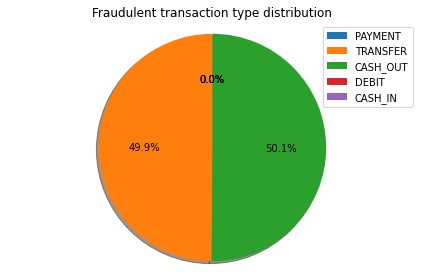

In [13]:
types = financial_data_raw['type'].unique()
fraud_cases = [financial_data_raw[financial_data_raw['type'] == trans]['isFraud'].sum() for trans in types]

plt.pie(fraud_cases, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Fraudulent transaction type distribution")
plt.legend(types, loc="best")

plt.axis('equal')
plt.tight_layout()
plt.show()

Interesting. Only 2 of the 5 types of transactions are associated with fraud. Our model will never benefit from knowing the other 3 classes and keeping them in the dataset is meaningless. For that reason, we are going to exclude those records.

In [14]:
financial_data = financial_data.loc[(financial_data['type'] == 'TRANSFER') | (financial_data['type'] == 'CASH_OUT')]

While we are at it, lets one hot encode this feature.

In [15]:
one_hot = pd.get_dummies(financial_data['type'])

And replace the old column

In [16]:
financial_data = financial_data.drop('type', axis=1)
financial_data = financial_data.join(one_hot)
financial_data.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,TRANSFER
2,1,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,1
3,1,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,1,0
15,1,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,1,0
19,1,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,1
24,1,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,1


### 2.A.c Feature engineering <a class="anchor" id="Feature_engineering_ff"></a>

It is apparent that we have other categorical columns. We know that the `type` category is fine but we can check `nameOrig` and `nameDest`

In [17]:
financial_data['nameOrig'].value_counts()

C2098525306    3
C1902386530    3
C724452879     3
C971280471     2
C2029550213    2
              ..
C1793346123    1
C712607142     1
C610451352     1
C2000909024    1
C1357230682    1
Name: nameOrig, Length: 2768630, dtype: int64

In [18]:
financial_data['nameDest'].value_counts()

C1286084959    75
C665576141     68
C1360767589    68
C97730845      67
C248609774     64
               ..
C1391038998     1
C1438442602     1
C374182545      1
C1681291913     1
C629594243      1
Name: nameDest, Length: 509565, dtype: int64

There are a ton of them (and it is expected). We see however that there are quite many matching destinations. Could that have something to do with the fraud?

In [19]:
financial_data[financial_data['isFraud']==1]['nameOrig'].value_counts()

C671542977     1
C1209224134    1
C2118037553    1
C1247938090    1
C83653019      1
              ..
C1191732945    1
C1438426689    1
C842027258     1
C1039979813    1
C2069798530    1
Name: nameOrig, Length: 8213, dtype: int64

In [20]:
financial_data[financial_data['isFraud']==1]['nameDest'].value_counts()

C1148781766    2
C1325541393    2
C644163395     2
C410033330     2
C686334805     2
              ..
C1002469873    1
C1040572676    1
C1670584857    1
C1716469564    1
C1834120741    1
Name: nameDest, Length: 8169, dtype: int64

Probably not. We want to make use of those columns but since they are account ids with such many values we cannot make dummies for them. ~What we can make out of them are 2 new columns that we will call _'beenScammed'_ and _'blacklist'_~. (Coming from the future, the models' decission is based all on that feature). We have no choice but to remove them.

In [21]:
#been_scammed_names = np.array(financial_data[financial_data['isFraud']==1]['nameOrig'].unique())
#blacklist_names = np.array(financial_data[financial_data['isFraud']==1]['nameDest'].unique())

In [22]:
#financial_data['beenScammed'] = np.where(financial_data['nameOrig'].isin(been_scammed_names), 1, 0)
#financial_data['blacklist'] = np.where(financial_data['nameDest'].isin(blacklist_names), 1, 0)

Now we are free to drop the original columns.

In [23]:
financial_data = financial_data.drop('nameOrig', axis = 1 )
financial_data = financial_data.drop('nameDest', axis = 1 )

As most of the transactions have errors in showing the account balances before and after transaction, we can get percentages of those faulty records.

In [24]:
wrong_orig_bal = sum(financial_data["oldbalanceOrg"] - financial_data["amount"] != financial_data["newbalanceOrig"])
wrong_dest_bal = sum(financial_data["newbalanceDest"] + financial_data["amount"] != financial_data["newbalanceDest"])

wrong_orig_bal_percentage = np.round(100*wrong_orig_bal/len(financial_data), 2)
wrong_dest_bal_percentage = np.round(100*wrong_dest_bal/len(financial_data), 2)

print("Percentage of records with balance errors in the account giving money: ", wrong_orig_bal_percentage)
print("Percentage of observations with balance errors in the account receiving money: ", wrong_dest_bal_percentage)

Percentage of records with balance errors in the account giving money:  93.72
Percentage of observations with balance errors in the account receiving money:  100.0


They are erronous and some of them may be due to fraud. We will store these errors in 2 new columns, regarding `balanceOrg` and `balanceDest`.
<br>
<br>

In [25]:
financial_data['errBalOrig'] = financial_data['newbalanceOrig'] + financial_data['amount'] - financial_data['oldbalanceOrg']
financial_data['errBalDest'] = financial_data['oldbalanceDest'] + financial_data['amount'] - financial_data['newbalanceDest']

Errors can be either:

* __negative on orig side__ - __Paying account__ has __less__ money after the transaction than they should.
* __negative on dest side__ - __Receiving account__ has __less__ money after the transaction than they should.
<br>
<br>
* __positive on orig side__ - __Paying account__ has __more__ money after the transaction than they should.
* __positive on dest side__ - __Receiving account__ has __more__ money after the transaction than they should.

Here we can see how they relate to valid and fraudulent transactions.

In [26]:
frauds = financial_data[financial_data['isFraud']==1]
valids = financial_data[financial_data['isFraud']==0]

fraud_pos_orig_error = len(frauds[frauds.errBalOrig > 0])/len(frauds)
valid_pos_orig_error = len(valids[valids.errBalOrig > 0])/len(valids)
fraud_pos_dest_error = len(frauds[frauds.errBalDest > 0])/len(frauds)
valid_pos_dest_error = len(valids[valids.errBalDest > 0])/len(valids)


fraud_pos_orig_error, valid_pos_orig_error, fraud_pos_dest_error, valid_pos_dest_error

(0.006331425788384269,
 0.9067180605576143,
 0.5712894192134421,
 0.19744942067832985)

In [27]:
len(frauds), len(valids)

(8213, 2762196)

In [28]:
len(frauds[frauds.errBalOrig > 0])

52

We see that a larger portion of fraud records show a positive error on destination account. Furthermore, positive orig errors are almost always valid.

In [29]:
financial_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,TRANSFER,errBalOrig,errBalDest
2,1,181.00,181.0,0.0,0.0,0.00,1,0,1,0.00,181.0
3,1,181.00,181.0,0.0,21182.0,0.00,1,1,0,0.00,21363.0
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,1,0,213808.94,182703.5
19,1,215310.30,705.0,0.0,22425.0,0.00,0,0,1,214605.30,237735.3
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,1,300850.89,-2401220.0


The dataset contains a special column - step. It is our timestamp of when the transaction occured througth the simulation.

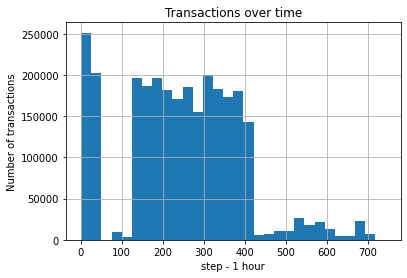

In [30]:
financial_data.hist(column='step', bins=30)
plt.xlabel('step - 1 hour')
plt.ylabel('Number of transactions')
plt.title("Transactions over time")
plt.show()

Check how fraud/valid rates change through time.

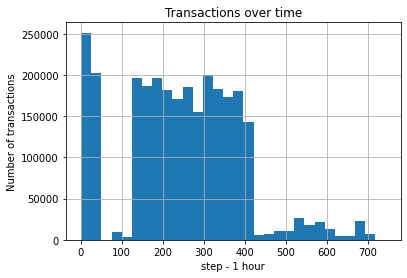

In [31]:
financial_data.hist(column='step', bins=30)
plt.xlabel('step - 1 hour')
plt.ylabel('Number of transactions')
plt.title("Transactions over time")
plt.show()

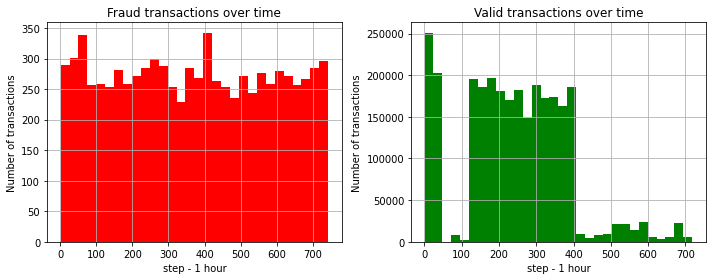

In [32]:
fig, (fraud_plot, valid_plot) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns

frauds.hist(column='step', bins=30, color = 'red', ax=fraud_plot)
valids.hist(column='step', bins=30, color = 'green', ax=valid_plot)

fraud_plot.set_xlabel('step - 1 hour')
fraud_plot.set_ylabel('Number of transactions')
fraud_plot.set_title("Fraud transactions over time")

valid_plot.set_xlabel('step - 1 hour')
valid_plot.set_ylabel('Number of transactions')
valid_plot.set_title("Valid transactions over time")


plt.tight_layout()
plt.show()

From the second histogram we see that a larger number of valid transactions is observed between `step > 100` and `step < 400`. However, the fraud rates do not seem to change. By incrementing step, an hour passes in that simulation. Lets convert them to a 24 hour format and see if that would tell us more.

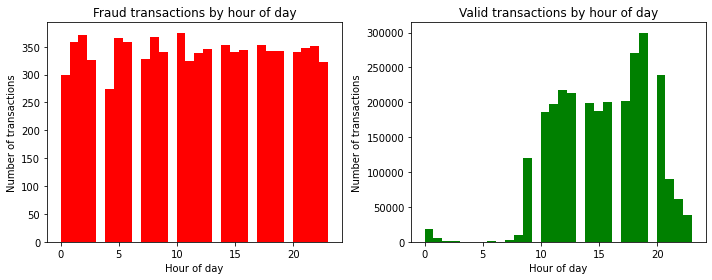

In [33]:
step_hour_of_day_fraud = frauds['step'] % 24
step_hour_of_day_valid = valids['step'] % 24

fig, (fraud_plot, valid_plot) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns

fraud_plot.hist(step_hour_of_day_fraud, bins=30, color = 'red')
valid_plot.hist(step_hour_of_day_valid, bins=30, color = 'green')

fraud_plot.set_xlabel('Hour of day')
fraud_plot.set_ylabel('Number of transactions')
fraud_plot.set_title("Fraud transactions by hour of day")

valid_plot.set_xlabel('Hour of day')
valid_plot.set_ylabel('Number of transactions')
valid_plot.set_title("Valid transactions by hour of day")


plt.tight_layout()
plt.show()

From this plot we see a major difference between fraud and valid transactions - valid transactions do not happen at night.
This is a worthy feature that we should add to the dataset.

In [34]:
financial_data["HourOfDay"] = financial_data['step'] % 24
financial_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,TRANSFER,errBalOrig,errBalDest,HourOfDay
2,1,181.00,181.0,0.0,0.0,0.00,1,0,1,0.00,181.0,1
3,1,181.00,181.0,0.0,21182.0,0.00,1,1,0,0.00,21363.0,1
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,1,0,213808.94,182703.5,1
19,1,215310.30,705.0,0.0,22425.0,0.00,0,0,1,214605.30,237735.3,1
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,1,300850.89,-2401220.0,1


Here our manual work with the dataset's features ends. Now we are going to balance it and prepare it for testing and training.

### 2.A.d Applying SMOTE <a class="anchor" id="Applying_SMOTE_ff"></a> 

Even after dropping out so many records, our dataset remains imbalanced:

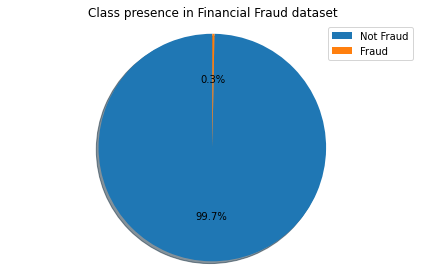

In [35]:
financial_isFraud_counts = financial_data['isFraud'].value_counts().to_list()

types = ["Not Fraud", "Fraud"]

plt.title("Class presence in Financial Fraud dataset")
plt.pie(financial_isFraud_counts, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.legend(types, loc="best")

plt.axis('equal')
plt.tight_layout()
plt.show()

We talked earlier about the different ways of overcoming this poblem. We will resample the minority class with SMOTE, but it is important to only use resampling methods on the train set, not on the test set. That is why we will make it a part of our pipeline after we split the dataset and in the modelling chapter.

For now, let's just see that it does what it is supposed to:

In [36]:
smote = SMOTE()
smote_atts_train, smote_target_train = smote.fit_resample(financial_data.drop(columns=['isFraud'], axis=1), financial_data['isFraud'])

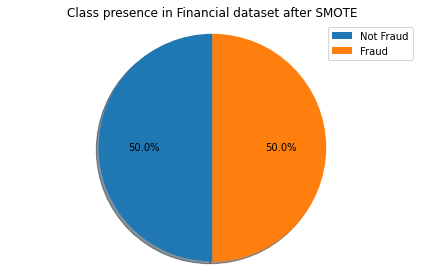

In [40]:
plt.pie([ len(smote_target_train) - smote_target_train.sum(), smote_target_train.sum()], autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title("Class presence in Financial dataset after SMOTE")
plt.legend(types, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

Now, let's try something bigger.

## 2.B Exploring the IEEE Comp dataset <a class="anchor" id="Exploring_the_IEEE_Comp_dataset"></a>

I found a dataset that I think would be more challenging.(I want my models to struggle so we can help them)
The datasets are from IEEE-CIS Fraud Detection which you can find 
<a href="https://www.kaggle.com/c/ieee-fraud-detection">here</a>. There are 4 datasets available - 2 for training and 2 for testing. It is not that they were kind enough to spare us a `train_test_split` but rather the training datasets are for us to work with(target column included) and the testing datasets are for actual submittions(Target columns are missing. I assume to prevent overfitting models from winning). Thus, since we are not going to submit anything, we will be working with the train datasets only.




### 2.B.a Reading the dataset <a class="anchor" id="Reading_the_dataset_ieee"></a>

In [41]:
ieee_trans_raw = pd.read_csv("data/ieee-fraud-detection/train_transaction.csv")
ieee_id_raw = pd.read_csv("data/ieee-fraud-detection/train_identity.csv")

In [42]:
ieee_trans_raw.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
ieee_id_raw.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


Let's check their sizes:

In [44]:
ieee_trans_raw.info(max_cols = 394)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 394 columns):
 #    Column          Non-Null Count   Dtype  
---   ------          --------------   -----  
 0    TransactionID   590540 non-null  int64  
 1    isFraud         590540 non-null  int64  
 2    TransactionDT   590540 non-null  int64  
 3    TransactionAmt  590540 non-null  float64
 4    ProductCD       590540 non-null  object 
 5    card1           590540 non-null  int64  
 6    card2           581607 non-null  float64
 7    card3           588975 non-null  float64
 8    card4           588963 non-null  object 
 9    card5           586281 non-null  float64
 10   card6           588969 non-null  object 
 11   addr1           524834 non-null  float64
 12   addr2           524834 non-null  float64
 13   dist1           238269 non-null  float64
 14   dist2           37627 non-null   float64
 15   P_emaildomain   496084 non-null  object 
 16   R_emaildomain   137291 non-null  obj

In [45]:
ieee_id_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

The deal with the 2 datasets is that 1 has transaction information and the other has identity information. They are connected via the `TransactionID` column. However, not all transactions have corresponding identity information.

Here is the column description provided:
<br>
<br>
- Transaction Table:
    * __TransactionDT__: timedelta from a given reference datetime (not an actual timestamp)
    * __TransactionAMT__: transaction payment amount in USD
    * __ProductCD__: product code, the product for each transaction
    * __card1__ - __card6__: payment card information, such as card type, card category, issue bank, country, etc.
    * __addr__: address
    * __dist__: distance
    * __P_ and (R__) emaildomain__: purchaser and recipient email domain
    * __C1-C14__: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
    * __D1-D15__: timedelta, such as days between previous transaction, etc.
    * __M1-M9__: match, such as names on card and address, etc.
    * __Vxxx__: Vesta engineered rich features, including ranking, counting, and other entity relations.

As for the identity table, the competition host only say the table includes network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions. The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement.


This does not bother us. What bothers us is that there are many NaN cells. Let's see the total numbers for each column.

### 2.B.b Data tidying and cleaning <a class="anchor" id="Data_tidying_and_cleaning_ieee"></a>

In [46]:
pd.options.display.max_columns = 394

In [47]:
nan_counts_trans = ieee_trans_raw.isnull().sum().to_frame().T
nan_counts_trans

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,0,0,0,0,0,0,8933,1565,1577,4259,1571,65706,65706,352271,552913,94456,453249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1269,280797,262878,168922,309841,517353,551623,515614,515614,76022,279287,525823,528588,528353,89113,271100,271100,271100,281444,350482,169360,346265,346252,346252,279287,279287,279287,279287,279287,279287,279287,279287,279287,279287,279287,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,76073,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,168969,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,77096,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,89164,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,508595,508595,508595,508595,508595,508589,508589,508589,508595,508595,508595,508595,508589,508589,508589,508595,508595,508595,508595,508595,508595,508589,508589,508595,508595,508595,508589,508589,508589,450909,450909,450721,450721,450721,450909,450909,450721,450721,450909,450909,450909,450909,450721,450909,450909,450909,450721,450721,450909,450909,450721,450721,450909,450909,450909,450909,450721,450721,450909,450721,450721,450909,450721,450721,450909,450909,450909,450909,450909,450909,450721,450721,450721,450909,450909,450909,450909,450909,450909,460110,460110,460110,449124,449124,449124,460110,460110,460110,460110,449124,460110,460110,460110,460110,460110,460110,449124,460110,460110,460110,449124,449124,460110,460110,460110,460110,460110,449124,460110,460110,460110,460110,449124,449124,460110,460110,460110,449124,449124,460110,460110,449124,460110,460110,460110,460110,460110,460110,460110,460110,460110,460110,449124,449124,449124,460110,460110,460110,460110,460110,460110,12,12,1269,1269,1269,12,12,12,12,1269,1269,12,12,12,12,12,12,1269,12,12,12,1269,1269,12,12,12,12,12,12,12,12,12,12,1

In [48]:
nan_counts_id = ieee_id_raw.isnull().sum().to_frame().T
nan_counts_id

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,0,3361,77909,77909,7368,7368,139078,139078,69307,69307,3255,0,16913,64189,3248,14893,4864,99120,4915,4972,139074,139064,139064,139486,139101,139070,139064,3255,3255,66668,3951,66647,70944,66428,3248,3248,3248,3248,3423,25567


In [49]:
pd.options.display.max_columns = 20

From what we see, dropping all columns that include NaN values would make us lose a large part of the dataset. Let's see those tables normalized by the total number of observations. Sadly, pandas magic will not help us here:

In [50]:
def get_nan_perc_normalized(df):
    total_records = len(df)
    columns = df.columns.to_list()
    normalized = np.array(df.isnull().sum().to_list())*100 / total_records
    return normalized

In [51]:
normalized_trans = get_nan_perc_normalized(ieee_trans_raw)
for i, val in enumerate(normalized_trans):
    print("Column '{}' NaN percentage: {}".format(ieee_trans_raw.columns.to_list()[i], val.round(2)))

Column 'TransactionID' NaN percentage: 0.0
Column 'isFraud' NaN percentage: 0.0
Column 'TransactionDT' NaN percentage: 0.0
Column 'TransactionAmt' NaN percentage: 0.0
Column 'ProductCD' NaN percentage: 0.0
Column 'card1' NaN percentage: 0.0
Column 'card2' NaN percentage: 1.51
Column 'card3' NaN percentage: 0.27
Column 'card4' NaN percentage: 0.27
Column 'card5' NaN percentage: 0.72
Column 'card6' NaN percentage: 0.27
Column 'addr1' NaN percentage: 11.13
Column 'addr2' NaN percentage: 11.13
Column 'dist1' NaN percentage: 59.65
Column 'dist2' NaN percentage: 93.63
Column 'P_emaildomain' NaN percentage: 15.99
Column 'R_emaildomain' NaN percentage: 76.75
Column 'C1' NaN percentage: 0.0
Column 'C2' NaN percentage: 0.0
Column 'C3' NaN percentage: 0.0
Column 'C4' NaN percentage: 0.0
Column 'C5' NaN percentage: 0.0
Column 'C6' NaN percentage: 0.0
Column 'C7' NaN percentage: 0.0
Column 'C8' NaN percentage: 0.0
Column 'C9' NaN percentage: 0.0
Column 'C10' NaN percentage: 0.0
Column 'C11' NaN per

In [52]:
normalized_id = get_nan_perc_normalized(ieee_id_raw)
for i, val in enumerate(normalized_id):
    print("Column '{}' NaN percentage: {}".format(ieee_id_raw.columns.to_list()[i], val.round(2)))

Column 'TransactionID' NaN percentage: 0.0
Column 'id_01' NaN percentage: 0.0
Column 'id_02' NaN percentage: 2.33
Column 'id_03' NaN percentage: 54.02
Column 'id_04' NaN percentage: 54.02
Column 'id_05' NaN percentage: 5.11
Column 'id_06' NaN percentage: 5.11
Column 'id_07' NaN percentage: 96.43
Column 'id_08' NaN percentage: 96.43
Column 'id_09' NaN percentage: 48.05
Column 'id_10' NaN percentage: 48.05
Column 'id_11' NaN percentage: 2.26
Column 'id_12' NaN percentage: 0.0
Column 'id_13' NaN percentage: 11.73
Column 'id_14' NaN percentage: 44.5
Column 'id_15' NaN percentage: 2.25
Column 'id_16' NaN percentage: 10.33
Column 'id_17' NaN percentage: 3.37
Column 'id_18' NaN percentage: 68.72
Column 'id_19' NaN percentage: 3.41
Column 'id_20' NaN percentage: 3.45
Column 'id_21' NaN percentage: 96.42
Column 'id_22' NaN percentage: 96.42
Column 'id_23' NaN percentage: 96.42
Column 'id_24' NaN percentage: 96.71
Column 'id_25' NaN percentage: 96.44
Column 'id_26' NaN percentage: 96.42
Column '

When working with NaN values, we have 3 options:
* Remove __features__ containing NaN values (If there are too many NaNs in regard to actual values)
* Remove __observations__ containing NaN values (If there are few)
* Replace all __cells__ containing NaN values with a default/predicted value

We will apply rule one first. Columns with high NaN percentage from above are useless for us. We will write a function that will remove columns that have NaN percentage beyond a certain threshold.

In [53]:
def remove_nan_cols(df, threshold):
    """
    Removes columns from `df` that have NaN percentage higher than a certain `threshold`.
    df: Pandas DataFrame to use
    threshold: Threshold for the NaN percentage.
    
    Example:
    remove_nan_cols(myDF, 50)
    """
    normalized_nan_perc_dict = dict(zip(df.columns.to_list(), get_nan_perc_normalized(df)))

    normalized_values = np.array(list(normalized_nan_perc_dict.values()))
    
    normalized_for_removal = normalized_values[np.where(normalized_values > threshold)]

    columns_for_removal = list()
    for col in normalized_nan_perc_dict:
        if normalized_nan_perc_dict[col] in normalized_for_removal:
            columns_for_removal.append(col)
           
    df_new = df.drop(columns = columns_for_removal, axis = 1)
    
    return df_new

And make smaller datasets.

In [54]:
ieee_id = remove_nan_cols(ieee_id_raw, 50)
ieee_trans = remove_nan_cols(ieee_trans_raw, 50)

In [55]:
ieee_trans.shape

(590540, 220)

In [56]:
ieee_id.shape

(144233, 29)

Now we have to do something with the NaN values left. Our approach may vary depending on what type our columns are.(Numerical/Categorical). Let's see if any of the remaining columns are categorical. Conveniently, this information is provided with the dataset <a href="https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203">here</a>.

In [57]:
trans_categoricals = ['ProductCD','card1','card2','card3','card4','card5','card6',
                      'addr1','addr2', 'P_emaildomain', 'R_emaildomain',
                     'M1','M2','M3','M4','M5','M6','M7','M8','M9']

id_categoricals = ["DeviceType", "DeviceInfo"] + ["id-"+str(i) for i in range(12,39)]

In [58]:
for col in trans_categoricals:
    if col in ieee_trans.columns.to_list():
        print("Column '{}' remains and is categorical".format(col))

Column 'ProductCD' remains and is categorical
Column 'card1' remains and is categorical
Column 'card2' remains and is categorical
Column 'card3' remains and is categorical
Column 'card4' remains and is categorical
Column 'card5' remains and is categorical
Column 'card6' remains and is categorical
Column 'addr1' remains and is categorical
Column 'addr2' remains and is categorical
Column 'P_emaildomain' remains and is categorical
Column 'M1' remains and is categorical
Column 'M2' remains and is categorical
Column 'M3' remains and is categorical
Column 'M4' remains and is categorical
Column 'M6' remains and is categorical


In [59]:
for col in id_categoricals:
    if col in ieee_id.columns.to_list():
        print("Column '{}' remains and is categorical".format(col))

Column 'DeviceType' remains and is categorical
Column 'DeviceInfo' remains and is categorical


Most of them seem to remain. Similar to how it's sometimes most appropriate to impute a missing numeric feature with zeros, sometimes a categorical feature's missing-ness itself is valuable information that should be explicitly encoded.
<br>
<br>
To check that, let's see if said features' missingness has something to do with fraud:

In [60]:
fraud_count = ieee_trans['isFraud'].sum()

for col in trans_categoricals:
    if col in ieee_trans.columns.to_list():
        perc = len(ieee_trans[(ieee_trans[col].isnull()) & ieee_trans['isFraud']==1])*100 / fraud_count
        print("Percentage of fraudulent transactions with NaN value in col {}: {}".format(col,perc.round(2))) 

Percentage of fraudulent transactions with NaN value in col ProductCD: 0.0
Percentage of fraudulent transactions with NaN value in col card1: 0.0
Percentage of fraudulent transactions with NaN value in col card2: 2.05
Percentage of fraudulent transactions with NaN value in col card3: 0.19
Percentage of fraudulent transactions with NaN value in col card4: 0.2
Percentage of fraudulent transactions with NaN value in col card5: 1.02
Percentage of fraudulent transactions with NaN value in col card6: 0.19
Percentage of fraudulent transactions with NaN value in col addr1: 37.46
Percentage of fraudulent transactions with NaN value in col addr2: 37.46
Percentage of fraudulent transactions with NaN value in col P_emaildomain: 13.5
Percentage of fraudulent transactions with NaN value in col M1: 69.31
Percentage of fraudulent transactions with NaN value in col M2: 69.31
Percentage of fraudulent transactions with NaN value in col M3: 69.31
Percentage of fraudulent transactions with NaN value in col

The valuable columns from above are the ones with very little or very high percentage. Because we are working with binary classification, if the target value is not from the target class it inevitably is from the non-target class. The features with low percentage are ones that most of the time are valid when their value is NaN, and the ones with high percentage are likely to be fraudulent if said information was missing.
<br>
<br>
We will take advantage only of the columns with percentage __more extreme__ than a certain threshold.
<br>

Let's pack this functionality in a function:

In [61]:
def separate_replace_types(df, categoricals, target_count, threshold):
    """
    """
    replace_unkwn = list()
    replace_freq = list()

    for col in categoricals:
        if col in df.columns.to_list():
            perc = len(df[(df[col].isnull()) & df['isFraud']==1])*100 / target_count
            if perc > threshold or perc < 100 - threshold:
                replace_unkwn.append(col)
            else:
                replace_freq.append(col)
                
    return replace_unkwn, replace_freq

Before calling the function, because we don't have an `isFraud` column in the identity dataset, we will take the opportunity to merge them now, since this is something we would have to do eventually.

In [62]:
ieee_merged = pd.merge(ieee_id, ieee_trans, on='TransactionID', how='inner')

Now we will explicitly set categorical type to all mentioned categories.

In [63]:
for col in trans_categoricals + id_categoricals:
    if col in ieee_merged.columns.to_list():
        ieee_merged[col] = ieee_merged[col].astype('category')

And now and only now do we fill the categorical missing values.

In [64]:
replace_unknwn, replace_freq = separate_replace_types(ieee_merged, trans_categoricals + id_categoricals, ieee_merged['isFraud'].sum(), 60)

For the columns whose missing-ness is important for fraud, we will fill the still present columns with a constant value.

In [65]:
for col in replace_unknwn:
    ieee_merged[col] = ieee_merged[col].astype('str')
    ieee_merged[col].fillna('UNKNWN', inplace=True)
    ieee_merged[col] = ieee_merged[col].astype('object')

And for rest we will use the most frequent value for that feature.

In [66]:
for col in replace_freq:
    ieee_merged[col].fillna(ieee_merged[col].mode(), inplace=True)

As a last touch, we need to encode the strings in our dataset. I often use one-hot encoding, but in this case the result will be thousands of columns(and jupyter crashes). Solely for this reason, I will use `LabelEncoder` instead.

In [67]:
for col in [cols for cols in ieee_merged.columns if ieee_merged[cols].dtype == 'object' or ieee_merged[cols].dtype.name == 'category']:
    le = LabelEncoder()
    ieee_merged[col] = ieee_merged[col].astype('str')
    ieee_merged[col] = le.fit_transform(ieee_merged[col])

In [68]:
ieee_merged.head()

,TransactionID,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_12,id_13,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,100.0,1,NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,2987008,-5.0,98945.0,0.0,-5.0,NaN,NaN,100.0,1,49.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,100.0,1,52.0,...,90.327904,90.327904,90.327904,90.327904,0.0,0.0,0.0,75.887497,75.887497,75.887497
3,2987011,-5.0,221832.0,0.0,-6.0,NaN,NaN,100.0,1,52.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,2987016,0.0,7460.0,1.0,0.0,0.0,0.0,100.0,1,NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


Now we move on to the continuous variables. 
We will use sklearn's `IterativeImputer`, which is based on the MICE method, but differs from it by returning a single imputation instead of multiple imputations. Of course, this can be solved by calling it several times.

Generally, the MICE algorithm goes as follows:
1. Replace (or impute) the missing values in each variable with temporary "place holder" values derived solely from the non-missing values available for that variable. For example, replace the missing age value with the mean age value observed in the data, replace the missing income values with the mean income value observed in the data, etc.

2. Set back to missing the “place holder” imputations for the age variable only. This way, the current data copy contains missing values for age, but not for income and gender.

3. Regress age on income and gender via a linear regression model (though it is possible to also regress age on only one of these variables); to be able to fit the model to the current data copy, drop all the records where age is missing during the model fitting process. In this model, age is the dependent variable and income and gender are the independent variables.

4. Use the fitted regression model in the previous step to predict the missing age values. (When age will be subsequently used as an independent variable in the regression models for other variables, both the observed values of age and these predicted values will be used.) The article doesn't make it clear that a random component should be added to these predictions.

5. Repeat Steps 2–4 separately for each variable that has missing data, namely income and gender.
<br>

Cycling through Steps 1 - 5 once for each of the incomplete columns constitutes one __cycle__. At the end of this cycle, all of the missing values in those columns will have been replaced with predictions from regression models that reflect the relationships observed in the data between these variables.

As stated earlier, MICE requires that we cycle through Steps 1 - 5 for a number of cycles, with the imputations of the missing values of the incomplete columns being updated at each cycle. In our case, each cycle is very slow because of how many columns we have. Solely for this reason, I will do only one.
<br>
<br>
First, we initialize the imputer:

In [69]:
mice = IterativeImputer()

Next, we transform the dataset. We will make a new copy and replace the columns in the original one from it. We can save time by dropping the categorical columns before fitting.

In [70]:
categoricals_left = set(trans_categoricals + id_categoricals) & set(ieee_merged.columns.tolist())

In [ ]:
%%time
ieee_merged_imputed = pd.DataFrame(mice.fit_transform(ieee_merged.drop(columns = categoricals_left, axis = 1)))
%store ieee_merged_imputed
#%store ieee_merged_test

The cell above takes time but you can retrieve the precomputed imputation

In [4]:
%store -r ieee_merged_test
ieee_merged_imputed = pd.DataFrame(ieee_merged_test)

Let's check the class imbalance for this dataset as well.

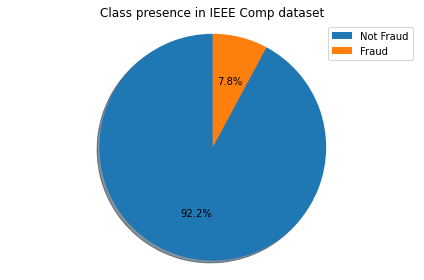

In [73]:
ieee_isFraud_counts = ieee_merged['isFraud'].value_counts().to_list()

types = ["Not Fraud", "Fraud"]

plt.title("Class presence in IEEE Comp dataset")
plt.pie(ieee_isFraud_counts, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.legend(types, loc="best")

plt.axis('equal')
plt.tight_layout()
plt.show()

# <div class="alert alert-block alert-danger">3. Financial Fraud modelling </div> <a class="anchor" id="Financial_Fraud_modelling"></a>


Let's start by splitting the dataset into data for training and testing.

In [37]:
attributes = financial_data.drop('isFraud', axis = 1)
target = financial_data['isFraud']
atts_train, atts_test, target_train, target_test = train_test_split(attributes, target, test_size = 0.3, random_state = 11, stratify= target)

By doing so we are shuffling the dataset, which also shuffles the indexes. These indexes will become important later when we make cross-validation and now is a good time to reset them.

In [38]:
atts_train = atts_train.reset_index()
target_train = target_train.reset_index()
atts_train = atts_train.drop(columns=["index"], axis = 1)
target_train = target_train.drop(columns=["index"], axis = 1)

## 3.A Setting a baseline <a class="anchor" id="Setting_a_baseline_ff"></a>

Whenever we are modelling data and improving our models we have to know what we are trying to improve. This is were we run simple/weak models and see how they perform. They give us a benchmark that we will be trying to beat.

### 3.A.a Logistic Regression <a class="anchor" id="Logistic_Regression"></a>

We will start with a basic model - Logistic Regression - that we will use as a baseline.

In [41]:
LR = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', LogisticRegression(random_state=11,
                                                                  max_iter=1000)]])

In real life, when we study for an exam, it is common to do some mock tests. They give us a rough idea of how well we are doing and help us decide if we are ready for said test or not. In a similiar manner, when we prepare models for an _"exam"_ , we force to do some practice tests that we call _validation_ tests.
<br>
<br>
To do that we use `KFold`. We test the model on different parts of the training _material_ and decide if they ready for the final test or not. We can use stratification to make these little parts represent the wider field of data better. It helps us especially when working with imbalanced datasets. By `SMOTE`, as we saw, our dataset is no longer imbalanced and it is unlikely that stratification will do much, but we can use it anyway.
<br>
<br>
Since our job is to classify, the `accuracy` metric would not be the best choice. Instead, we will use the `F1 Score` metric.

In [39]:
def perform_skf(model, atts, target):
    """
    Fits classificator `model` to a dataset and performs a stratified k-fold cross validation.
    
    Returns:
        A list of f1 scores from each fold.
    """
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    f1_stratified = []
    
    for train_index, test_index in tqdm(skf.split(atts, target), total = 5):
        if type(atts) == np.ndarray:
            atts = pd.DataFrame(atts)

        x_train_fold, x_test_fold = atts.loc[train_index], atts.loc[test_index]
        y_train_fold, y_test_fold = target.loc[train_index], target.loc[test_index]
       
        y_train_fold = y_train_fold[target.columns.to_list()[0]].ravel()
        y_test_fold = y_test_fold[target.columns.to_list()[0]].ravel()
        
        model.fit(x_train_fold, y_train_fold)
        predictions = model.predict(x_test_fold)
        f = f1_score(y_test_fold, predictions)
        f1_stratified.append(f)

    return f1_stratified

In [79]:
lr_f1_scores = perform_skf(LR, atts_train, target_train)

  0%|          | 0/5 [00:00<?, ?it/s]

## 3.A.b Evaluation <a class="anchor" id="Evaluation_FF"></a>

Before we show the results, let's quicky define functions for plotting to make things pretty.
<br>
<br>
First, we will be showing learning curves of our models:

In [76]:
def plot_learning_curve(estimator, model_name, X, y, ylim=None, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    Plots a learning curve and prediction time vs score
    """
    _, axes = plt.subplots(1, 2, figsize=[12.4, 4.8])


    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve( estimator,
                                                                          X,
                                                                          y,
                                                                          cv=cv,
                                                                          n_jobs=-1,
                                                                          train_sizes=train_sizes,
                                                                          scoring = "f1",
                                                                          shuffle = True,
                                                                          random_state = 11,
                                                                          return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    axes[0].grid()
    axes[0].set_title("Learning curve of {}".format(model_name))
    #axes[0].set_ylim((0,1))
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("F1 score")
    
    axes[0].plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                                                                                                                  color="r")
    
    axes[0].plot(train_sizes, test_scores_mean, "o-", color="b", label="Cross-validation score")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                                                                                                              color="b",
    )
    
    axes[0].legend(loc="best")

    axes[1].grid()
    #axes[1].set_ylim((0,1))
    axes[1].plot(fit_times_mean, test_scores_mean, "o-")
    axes[1].fill_between( fit_times_mean, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
    axes[1].set_xlabel("fit_times")
    axes[1].set_ylabel("F1 score")
    axes[1].set_title("Performance of the model")

    plt.show()

We will print the f1 stats that we got from the `perform_skf` function.

In [81]:
def print_f1_stats(f1_scores):
    print('List of observed f1 scores:', f1_scores)
    print('\nMaximum F1-score:', max(f1_scores)*100, '%')
    print('\nMinimum F1-score:', min(f1_scores)*100, '%')
    print('\nOverall F1-score:', np.mean(f1_scores)*100, '%')

We will also be plotting a roc curve for some models.

In [82]:
def plot_roc_curve(target, predictions, model_name):
    false_pos_rate, true_pos_rate, _ = roc_curve(target, predictions)
    
    area = auc(false_pos_rate, true_pos_rate)
    
    plt.title("ROC curve of {}".format(model_name))
    plt.plot(false_pos_rate,true_pos_rate,label="AUC="+str(area))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

And in a similar manner we will plot feature importances for our models.

In [83]:
def plot_feature_importance(model, model_name):
    importance = list()
    try:
        importance = model.coef_[0]
    except:
        try:
            importance = model.feature_importances_
        except:
            return
    plt.title("Feature importances of {}".format(model_name))
    plt.bar([x for x in range(len(importance))],importance)
    plt.xticks([x for x in range(len(importance))], atts_train.columns.to_list(), rotation=60)
    plt.show()

In [84]:
print_f1_stats(lr_f1_scores)

List of observed f1 scores: [0.08890284381447924, 0.08771774692722611, 0.08679943602396897, 0.08922811321611922, 0.08844355377421509]

Maximum F1-score: 8.922811321611922 %

Minimum F1-score: 8.679943602396897 %

Overall F1-score: 8.821833875120173 %


In [132]:
preds = LR.predict(atts_train)

In [133]:
print(classification_report(preds, target_train))

              precision    recall  f1-score   support

           0       0.05      0.95      0.10    107147
           1       0.14      0.00      0.00   1832139

    accuracy                           0.05   1939286
   macro avg       0.10      0.48      0.05   1939286
weighted avg       0.13      0.05      0.01   1939286



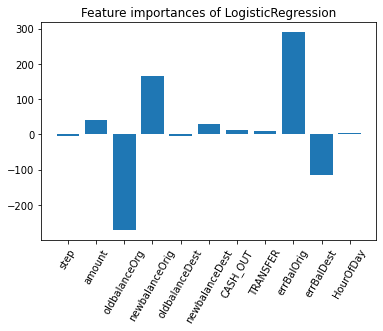

In [86]:
plot_feature_importance(LR['classifier'], "LogisticRegression")

Very poor results. We will give it another go in the tuning section.

## 3.B Tuning  <a class="anchor" id="Tuning_ff"></a>

We set our baseline without hyperparameter tuning. In this section, we will focus on that as well as try other models.

### 3.B.a Tuning Logistic Regression <a class="anchor" id="Logistic_Regression_tuning"></a>

Let's try to tune the logistic regression. Optimizing `C` parameter will not fix the linearity issue. In order to address it, we will use `Polynomial Features`.

In [65]:
atts_train_smoted, target_train_smoted = SMOTE().fit_resample(atts_train, target_train)
poly = PolynomialFeatures(degree = 2)
atts_train_poly = poly.fit_transform(atts_train_smoted)
scaler = MinMaxScaler()
atts_train_scaled = scaler.fit_transform(atts_train_poly)

After preparing a new dataset, let's find optimal value for `C`.

In [42]:
parameters = {'classifier__C':[0.01, 0.1, 1, 10, 100, 1000]}

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

clf = GridSearchCV(LR, parameters, cv = k_fold, n_jobs=-1, scoring = 'f1')

In [43]:
clf.fit(atts_train, target_train['isFraud'])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=11)],
                                       ['scaler', MinMaxScaler()],
                                       ['classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=11)]]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring='f1')

In [44]:
LR_best_pipeline = None

LR_best_pipeline = clf.best_estimator_

##Or you can use the pretrained pipeline
# with open('lr_best_pipeline.pickle', 'rb') as f:
#     LR_best_pipeline = pickle.load(f)

LR_best_pipeline['classifier'].C

100

In [47]:
pd.DataFrame(clf.cv_results_).drop(columns=["params"]).set_index('param_classifier__C')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
param_classifier__C,,,,,,,,,,,,
0.01,479.099868,26.231844,4.875154,1.777584,0.034975,0.034325,0.034389,0.034429,0.035739,0.034771,0.000537,6
0.10,848.433616,165.731272,4.196924,0.482342,0.062923,0.062637,0.061720,0.063886,0.064329,0.063099,0.000925,5
1.00,995.058378,426.879596,2.546004,0.882430,0.088799,0.087675,0.086734,0.089317,0.088455,0.088196,0.000905,4
10.00,1787.171215,114.833848,1.619445,0.769535,0.105862,0.104681,0.109998,0.105619,0.102397,0.105711,0.002468,3
100.00,983.567484,391.323304,2.030062,1.118689,0.107004,0.106751,0.116439,0.104522,0.101626,0.107268,0.004976,1
1000.00,763.953244,77.374874,1.522014,0.579114,0.106919,0.106572,0.116821,0.103713,0.101508,0.107106,0.005245,2


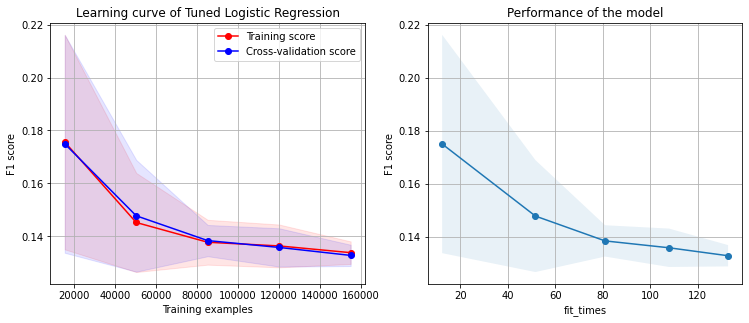

In [87]:
plot_learning_curve(LR_best_pipeline, "Tuned Logistic Regression", atts_train[::10], target_train[::10], cv=5)

The results from the cross-validation and GridSearch are really poor, the best model (C=100) is likely chosen by chance.

In [134]:
preds = LR_best_pipeline.predict(atts_train[:10000])
print(classification_report(preds, target_train[:10000]))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9495
           1       0.85      0.04      0.08       505

    accuracy                           0.95     10000
   macro avg       0.90      0.52      0.53     10000
weighted avg       0.95      0.95      0.93     10000



The model still Lets again with applying `PolynomialFeatures` and `SMOTE`.

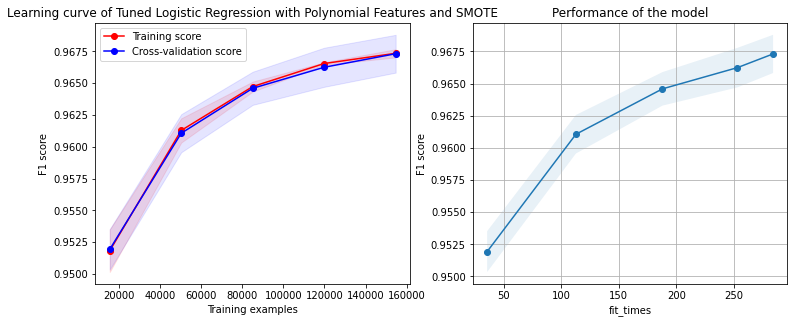

In [71]:
plot_learning_curve(LR_best_pipeline['classifier'], "Tuned Logistic Regression with Polynomial Features and SMOTE", atts_train_scaled[::20], target_train_smoted[::20], cv=5)

In [ ]:
plot_learning_curve(LR_best_pipeline['classifier'], "Tuned Logistic Regression with Polynomial Features and SMOTE", atts_train_scaled[::20], target_train_smoted[::20], cv=5)

In [46]:
with open('lr_best_pipeline.pickle', 'wb') as f:
    pickle.dump(LR_best_pipeline, f)

### 3.B.b XGBoost Classifier <a class="anchor" id="XGBoost_Classifier"></a>

Along with the Logistic will try a more sophisticated model - the __Extreme Gradient Boosting__ (XGBoost). It is an algorithm famous for it's prediction speed, accuracy and is a part of the __ensemble methods__.
<br>
<br>
Sometimes we fit a single model to the data and that is sufficient to get good results. Other times it is not and one way to tackle this problem is to make several algorithms work together. We add a second model that focuses on accurately predicting the cases where the first model performs poorly. We do this over and over and this process is called __boosting__.
<br>
<br>
__Gradient__ boosting relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error. How are the targets calculated? The target outcome for each case in the data depends on how much changing that case's prediction impacts the overall prediction error:

1. If a small change in the prediction for a case causes a large drop in error, then next target outcome of the case is a high value. Predictions from the new model that are close to its targets will reduce the error.

2. If a small change in the prediction for a case causes no change in error, then next target outcome of the case is zero. Changing this prediction does not decrease the error.

The name __gradient__ boosting arises because target outcomes for each case are set based on the gradient of the error with respect to the prediction. Each new model takes a step in the direction that minimizes prediction error, in the space of possible predictions for each training case.
<br>
<br>
The one we are going to be using is working with trees under the hood, which means that they are fairly insensitive to the scale of the features and imbalanced data.

In [98]:
XGB = None

XGB = XGBClassifier(random_state = 1, use_label_encoder=False)
xgb_f1_scores = perform_skf(XGB)

##Or you can use the pretrained model
# with open('xgb_classifier.pickle', 'rb') as f:
#     XGB = pickle.load(f)

In [ ]:
print_f1_stats(xgb_f1_scores)

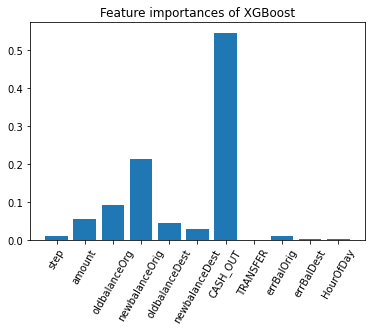

In [108]:
plot_feature_importance(XGB, "XGBoost")

We can see something interesting here. If we go back and look at the pie chart we will see similar proportions there. Being the majority of fraudulent classes, `CASH_OUT` and `TRANSFER` become self-cancelling.

Additionally, we can plot the permutation feature importance.
<br>
__What is the difference?__
<br>
* __Feature importance__, as the one above, takes into account how often is certain feature used to make a new split in the tree.

* The __permutation feature importance__ is defined to be the decrease in a model score when a single feature value is randomly shuffled 1. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature.

For the shuffle, we will draw a new validation set to save some time.

In [109]:
atts_val, _, target_val, _ = train_test_split(atts_train, target_train, train_size=0.5, stratify=target_train)

In [110]:
r_multi = permutation_importance(
    XGB, atts_val, target_val, n_repeats=10, random_state=0, scoring='f1')

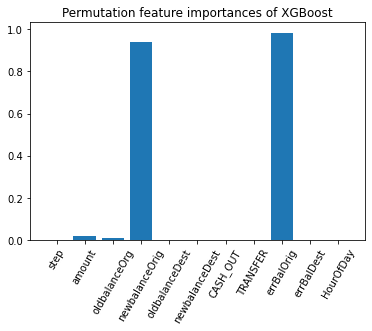

In [111]:
plt.title("Permutation feature importances of {}".format("XGBoost"))
plt.bar([x for x in range(len(r_multi['importances_mean']))],r_multi['importances_mean'])
plt.xticks([x for x in range(len(r_multi['importances_mean']))], atts_train.columns.to_list(), rotation=60)
plt.show()

Let's save it to a file.

In [103]:
with open('xgb_classifier.pickle', 'wb') as f:
    pickle.dump(XGB, f)

### 3.B.c Random Forest Classifier <a class="anchor" id="Random_Forest_Classifier_ff"></a>

The XGBoost model we just trained uses a sequence of trees to make a prediction. Unlike XGBoost, `RandomForest` uses many trees and polls a prediction from them. This will be the last model that we will try.
<br>
<br>
First, we will try the default param configuration:

In [112]:
RF = RandomForestClassifier(random_state=11)
rf_base_f1_scores = perform_skf(RF, atts_train, target_train)

  0%|          | 0/5 [00:00<?, ?it/s]

In [113]:
print_f1_stats(rf_base_f1_scores)

List of observed f1 scores: [0.9969472307021369, 0.997384481255449, 0.999129677980853, 0.997384481255449, 0.9986939486286461]

Maximum F1-score: 99.91296779808529 %

Minimum F1-score: 99.69472307021368 %

Overall F1-score: 99.79079639645067 %


In [ ]:
with open('random_forest.pickle', 'wb') as f:
    pickle.dump(RF, f)

Let's see the depth of each tree in the forest:

In [137]:
rf_trees_depth = [estimator.tree_.max_depth for estimator in RF.estimators_]
print(rf_trees_depth)

[15, 14, 16, 14, 20, 17, 15, 21, 25, 15, 24, 18, 17, 19, 18, 19, 20, 21, 15, 19, 22, 24, 22, 13, 19, 15, 19, 20, 17, 23, 14, 12, 18, 26, 21, 18, 14, 14, 25, 27, 23, 23, 17, 16, 15, 20, 19, 19, 24, 18, 15, 21, 16, 19, 18, 20, 23, 16, 17, 18, 18, 26, 17, 16, 15, 24, 18, 20, 23, 21, 19, 15, 17, 26, 21, 24, 18, 17, 14, 16, 27, 25, 26, 30, 20, 17, 19, 18, 22, 23, 12, 23, 17, 14, 18, 26, 20, 21, 20, 16]


They seem quite deep. We want to try to reduce that depth while not losing accuracy(f1 score). Our dataset currently has over 1 million records, which will make the training slow. Which is why we will go with the `gini` function to measure the quality of a split and, for the fun of it, we will not use `GridSearch` but `RandomizedSearch`. Since we will be choosing configs at random we can get wild with the params.
<br>
<br>
To save time, we will only use half our training set. That is - the validation set we defined to get the permutation feature importance.

In [138]:
mean_rf_tree_depth = int(np.mean(rf_trees_depth).round())

In [139]:
parameters_rf = {
    'classifier__bootstrap': [RF.bootstrap],
    'classifier__max_depth': [mean_rf_tree_depth - 5, mean_rf_tree_depth - 2, mean_rf_tree_depth - 1],
    'classifier__max_features': [2, 3, 4],
    'classifier__min_samples_leaf': [1, 3, 4, 5],
    'classifier__min_samples_split': [4, 8, 10, 12],
    'classifier__n_estimators': [100, 200, 300, 500]
}

What we said abous XGBoost is valid for RandomForest as well - it is not sensitive to imbalanced data.

In [ ]:
%%time

RF_tuned = Pipeline(steps = [ ['scaler', MinMaxScaler()],
                           ['classifier', RandomForestClassifier(random_state=11)]])

clf = RandomizedSearchCV(RF_tuned, parameters_rf, n_iter = 40, cv = 4, scoring = 'f1', n_jobs = -1)
clf.fit(atts_val, target_val)

#Or you can use the pretrained pipeline
with open('random_forest_tuned.pickle', 'rb') as f:
    RF_tuned = pickle.load(f)

In [ ]:
with open('random_forest_tuned.pickle', 'wb') as f:
    pickle.dump(RF_tuned, f)

In [ ]:
cv_report_rf = pd.DataFrame(clf.cv_results_).drop(columns = ["params"])

In [ ]:
pd.set_option('display.max_colwidth', 20)  

In [ ]:
cv_report_rf

All of the models score really well. The differences in the `test_score` columns are very low and so is their `std`.
The number of estimators (as expected) along with other parameters increases the time it takes to fit and score each model.

In [ ]:
n_estimators = cv_report_rf.groupby(["param_classifier__n_estimators"]).describe().index.to_list()
mean_fit_time = cv_report_rf.groupby(["param_classifier__n_estimators"]).describe()['mean_fit_time']['mean']
mean_score_time = cv_report_rf.groupby(["param_classifier__n_estimators"]).describe()['mean_score_time']['mean']

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Correlation between # estimators and operation times")
ax.set_xlabel("Number of estimators")
ax.set_ylabel("Mean fit time")
ax.set_zlabel("Mean score time")
ax.scatter(n_estimators, mean_fit_time, mean_score_time,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=mean_score_time)
plt.show()

In [ ]:
def get_pearson_coefficient(col):
    var = cv_report_rf.groupby([col]).describe().index.to_list()
    mean_fit_time = cv_report_rf.groupby([col]).describe()['mean_fit_time']['mean']
    mean_score_time = cv_report_rf.groupby([col]).describe()['mean_score_time']['mean']
    
    return pearsonr(var, mean_fit_time)[0], pearsonr(var, mean_score_time)[0]

In [ ]:
parameters_rf_pearson = list(parameters_rf.keys())

coefs = [get_pearson_coefficient("param_"+c) for c in parameters_rf_pearson]

In [ ]:
pd.DataFrame({'param':[p.replace("classifier__", "") for p in parameters_rf_pearson], 
              'mean_fit_time':[c[0] for c in coefs],
              'mean_score_time':[c[1] for c in coefs]})

As a reminder, positive pearson coefficient states positive correlation and vice versa. Coefficient equal to 0 states no correlation.
<br>
<br>
Anyway, from here we can decide what we want to optimize. As we saw, random forest by default does not take ages to fit and if this model was ever deployed it would be important for every company to give predictions fast. We will optimize scoring time.

In [147]:
RF_optimized = RandomForestClassifier(random_state = 11, 
                                      max_depth = mean_rf_tree_depth - 5,
                                      max_features = 4, 
                                      min_samples_leaf = 5,
                                      min_samples_split = 12,
                                      n_estimators = 100)

RF_optimized.fit(atts_train, target_train['isFraud'])
#rf_optimized_f1_scores = perform_skf(RF_optimized, atts_train, target_train)
#print(rf_optimized_f1_scores)

RandomForestClassifier(max_depth=14, max_features=4, min_samples_leaf=5,
                       min_samples_split=12, random_state=11)

### 3.C Comparison <a class="anchor" id="Comparison_FF"></a>

We have trained 3 models on that dataset and in this section we will compare them to choose the best.
<br>
We are going to have 2 criterias - __prediction speed__ and __prediction correctness__.
<br>
<br>
Let's define a function that will let us plot a pair for each model - evaluating f1 score and speed.

In [ ]:
LR_best_pipeline.fit(atts_train, target_train['isFraud'])
XGB.fit(atts_train, target_train['isFraud'])
RF_optimized.fit(atts_train, target_train['isFraud'])

#### Logistic Regression

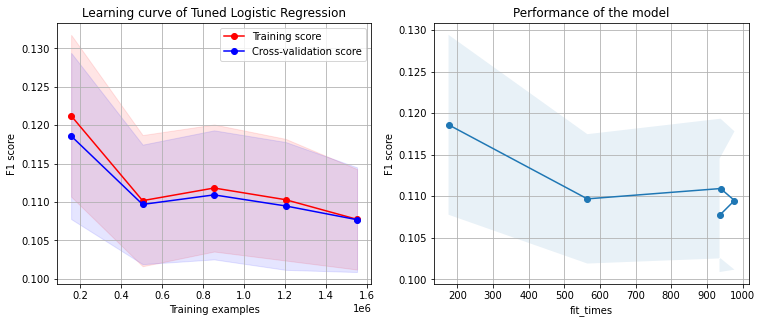

In [94]:
plot_learning_curve(LR_best_pipeline, "Tuned Logistic Regression", atts_train, target_train['isFraud'], cv=5)

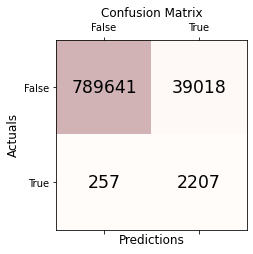

Wall time: 3.79 s


In [95]:
%%time
lr_best_test_predictions = LR_best_pipeline.predict(atts_test)
plot_conf_matrix(target_test, lr_best_test_predictions)

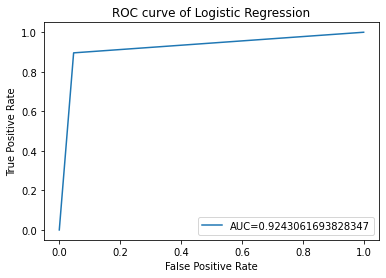

In [96]:
plot_roc_curve(target_test, lr_best_test_predictions, "Logistic Regression")

#### XGBoost

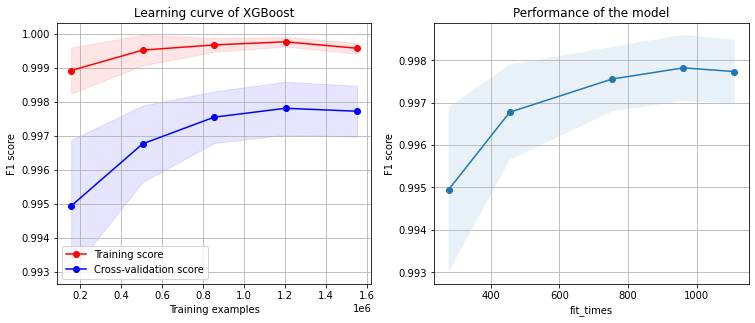

In [99]:
plot_learning_curve(XGB, "XGBoost", atts_train, target_train['isFraud'], cv=5)

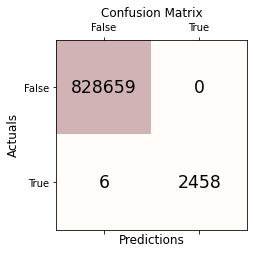

Wall time: 1.31 s


In [100]:
%%time
xgb_test_predictions = XGB.predict(atts_test)
plot_conf_matrix(target_test, xgb_test_predictions)

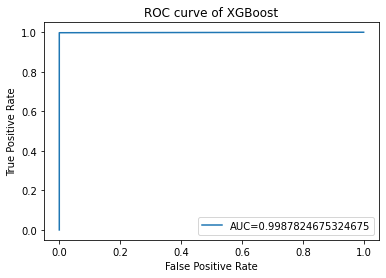

In [101]:
plot_roc_curve(target_test, xgb_test_predictions, "XGBoost")

#### Random Forest

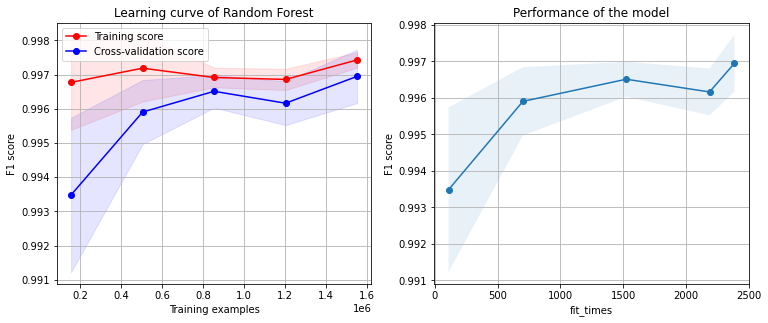

In [142]:
plot_learning_curve(RF_optimized, "Random Forest", atts_train, target_train['isFraud'], cv=5)

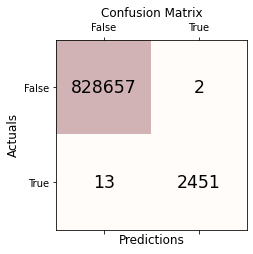

Wall time: 6.53 s


In [148]:
%%time
rf_optimized_test_predictions = RF_optimized.predict(atts_test)
plot_conf_matrix(target_test, rf_optimized_test_predictions)

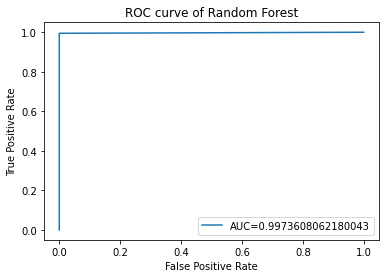

In [149]:
plot_roc_curve(target_test, rf_optimized_test_predictions, "Random Forest")

# <div class="alert alert-block alert-danger">4. IEEE Comp modeling </div> <a class="anchor" id="IEEE_Comp_modelling"></a>

Moving on to our second dataset. We will start with splitting it for training and testing.

In [5]:
ieee_atts = ieee_merged_imputed.drop(columns=[27], axis = 1)
ieee_target = ieee_merged_imputed[27].astype(int)

In [6]:
ieee_atts_train, ieee_atts_test, ieee_target_train, ieee_target_test = train_test_split(ieee_atts, 
                                                                                        ieee_target, 
                                                                                        test_size = 0.3, 
                                                                                        random_state = 11)

In [7]:
ieee_atts_train = ieee_atts_train.reset_index()
ieee_target_train = ieee_target_train.reset_index()
ieee_atts_train = ieee_atts_train.drop(columns=["index"], axis = 1)
ieee_target_train = ieee_target_train.drop(columns=["index"], axis = 1)

## 4.A Setting a baseline <a class="anchor" id="Setting_a_baseline_ieee"></a>

Once again, we will use the Logistic Regression as a baseline model. This time around we will see how it performs with and without SMOTE.

In [153]:
LR_ieee = imbpipeline(steps = [    ['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', LogisticRegression(random_state=1,
                                                                  max_iter=1000)]])

LR_ieee_smoteless = Pipeline(steps = [
                                ['scaler', MinMaxScaler()],
                                ['classifier', LogisticRegression(random_state=1,
                                                                  max_iter=1000)]])

#LR.fit(atts_train, target_train)

In [77]:
lr_ieee_f1_score = perform_skf(LR_ieee, ieee_atts_train, ieee_target_train)
print_f1_stats(lr_ieee_f1_score)

  0%|          | 0/5 [00:00<?, ?it/s]

List of observed f1 scores: [0.3840544482255712, 0.37051597051597057, 0.3706259241005421, 0.3712047012732615, 0.3541666666666667]

Maximum F1-score: 38.40544482255712 %

Minimum F1-score: 35.41666666666667 %

Overall F1-score: 37.011354215640246 %


### 4.A.b Evaluation <a class="anchor" id="Evaluation_ieee"></a>

To evaluate the model (and also SMOTE), we will plot the learning curves of the model with and without SMOTE in the pipeline.

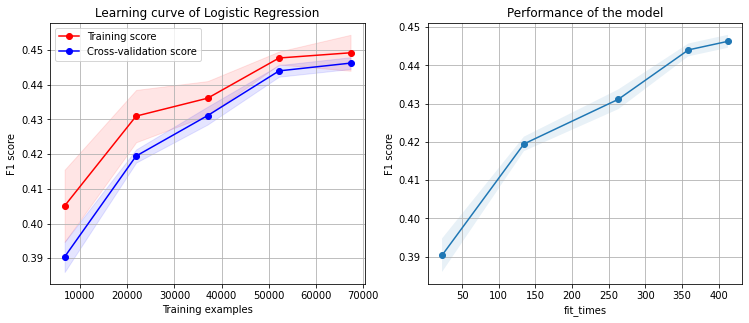

In [161]:
plot_learning_curve( LR_ieee, "Logistic Regression", ieee_atts_train, ieee_target_train, cv=3)

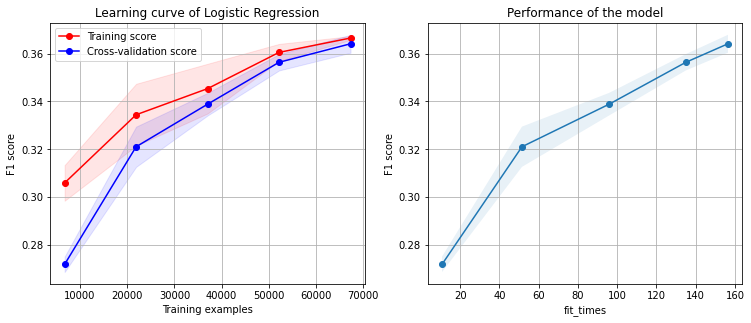

In [162]:
plot_learning_curve( LR_ieee_smoteless, "Logistic Regression", ieee_atts_train, ieee_target_train[27], cv=3)

SMOTE in this case gives us better F1 score but takes additional time to transform the raw data. Still, in both cases the score is low.
<br>
<br>
The model however doesn't seem to be done working. Lets memorize that score, increase the `max_iter` parameter and try again.

In [174]:
LR_ieee['classifier'].max_iter = 3000

In [175]:
print_f1_stats(perform_skf(LR_ieee, ieee_atts_train, ieee_target_train))

  0%|          | 0/5 [00:00<?, ?it/s]

List of observed f1 scores: [0.4393694421988682, 0.44693420248523125, 0.46220213640098606, 0.4448448448448448, 0.4528147389969294]

Maximum F1-score: 46.220213640098606 %

Minimum F1-score: 43.93694421988682 %

Overall F1-score: 44.923307298537196 %


## 4.B Dimensionality Reduction <a class="anchor" id="Dimensionality_reduction"></a>

### 4.B.a PCA <a class="anchor" id="PCA"></a>

We have quite many features which will be a problem later with the more complex models.
<br>
<br>
Let's reduce the dimensionality with PCA. To that we would need to scale the values first.

In [12]:
pca_pipe = Pipeline(steps = [ ['scaler', MinMaxScaler()],
                           ['pca', PCA()]])
pca_pipe.fit(ieee_atts_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ['pca', PCA()]])

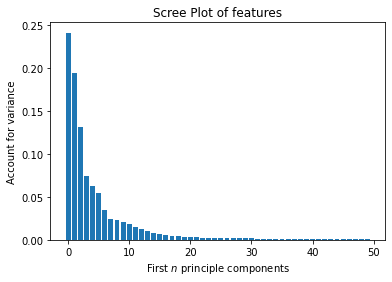

In [13]:
plt.bar(range(50), pca_pipe['pca'].explained_variance_ratio_[:50])
plt.title("Scree Plot of features")
plt.xlabel("First $\it{n}$ principle components")
plt.ylabel("Account for variance")
plt.show()

We will only use top 40 components.

In [14]:
pca_pipe['pca'].n_components = 40
ieee_atts_train_pca = pd.DataFrame(pca_pipe.fit_transform(ieee_atts_train))

And now we can see what percentage of the variance in our data we are preserving.

In [15]:
sum(pca_pipe['pca'].explained_variance_ratio_)

0.9842074304879099

### 4.B.b LinDA <a class="anchor" id="LinDA"></a>

We will also transform the features with Linear Discriminant Analysis. It finds it's coefficients using the variation between the classes (explanation <a href="https://www.youtube.com/watch?v=azXCzI57Yfc">here</a>), so the scaling doesn't matter.
<br>
<br>
Both algorithms rank the new axes in order of importance. However, instead of looking for variation in the data, LDA looks for variation in the categories.

In [48]:
linDA = LinearDiscriminantAnalysis(solver='svd')
linDA.fit(ieee_atts_train, ieee_target_train[27])
linDA.n_components = 40

In [264]:
ieee_atts_train_lda = linDA.transform(ieee_atts_test)

In [265]:
pd.DataFrame(ieee_atts_train_lda)

,0
0,-0.586446
1,-0.141620
2,-0.362998
3,-0.536876
4,-0.490848
...,...
43265,-0.534265
43266,-0.520786
43267,-0.770669
43268,-0.530664


Additionaly, LinDA can also be used as a model. Let's try it on the raw dataset.

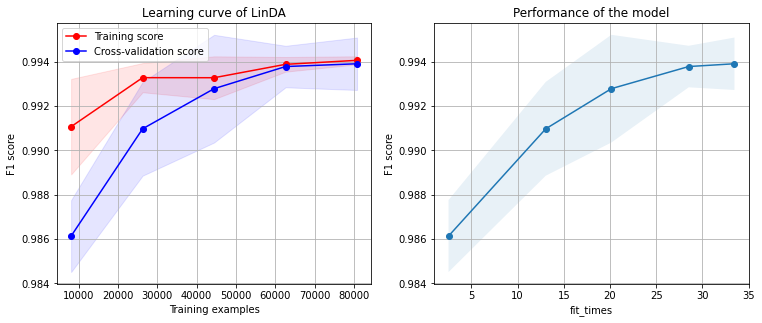

In [243]:
plot_learning_curve(linDA, "LinDA", ieee_atts_train, ieee_target_train[27], cv=5)

## 4.C Tuning  <a class="anchor" id="Tuning_ieee"></a>

###  4.C.a Fraud as anomaly <a class="anchor" id="Fraud_as_anomaly"></a>

We made this dataset relatively small and we have a shot at looking at the task from a different point.
<br>
<br>
Apart of using the labels, we can try to treat the fraudulent transactions as annomalies. We will train a `OneClassSVM`.

In [112]:
%%time
one_class_svc = OneClassSVM(nu = 0.001, gamma = 0.1)
one_class_svc.fit(negative_cases_atts)

Wall time: 1.24 s


OneClassSVM(gamma=0.1, nu=0.001)

When predicting, OneClassSVM outputs `1` if it thinks the data is an inlier and `-1` if it is an outlier. It does not care for the labels. We do however and in order to evaluate the model we would need to make those class `id`s match.

In [9]:
oc_svm_target = ieee_target_train[27].copy()
oc_svm_target[oc_svm_target == 1] = -1
oc_svm_target[oc_svm_target == 0] = 1
np.unique(oc_svm_target)

array([-1,  1])

In [36]:
oc_svm_target = ieee_target_train[27].copy()
oc_svm_target[oc_svm_target == 0] = -1
np.unique(oc_svm_target)

array([-1,  1])

To find the best hyperparameter configuration we will use `ParameterGrid` instead of `GridSearch` which, for the reasons mentioned above, is not compatible with `OneClassSVM`.

In [8]:
ieee_oc_svm_params = { 'gamma': [0.3, 0.5, 1, 2, 5, 8],
                       'nu': [ 1e-3, 1e-2, 1e-1]
                     }
one_class_svc_tuned = OneClassSVM()

##Or you can use the pretrained pipeline
#with open('one_class_svc_tuned.pickle', 'rb') as f:
#    one_class_svc_tuned = pickle.load(f)

In [16]:
clf = GridSearchCV(one_class_svc_tuned, ieee_oc_svm_params, scoring = "f1", cv=3, n_jobs=-1)
clf.fit(ieee_atts_train_pca, oc_svm_target)

##Or you can use the pretrained gridsearch
#with open('one_class_svc_tuned_gscv.pickle', 'rb') as f:
#        clf = pickle.load(f)

GridSearchCV(cv=3, estimator=OneClassSVM(), n_jobs=-1,
             param_grid={'gamma': [0.3, 0.5, 1, 2, 5, 8],
                         'nu': [0.001, 0.01, 0.1]},
             scoring='f1')

In [34]:
one_class_svc_tuned = clf.best_estimator_

In [18]:
clf.best_score_

0.9587437381502214

In [40]:
one_class_svc_tuned_train_predictions = clf.best_estimator_.predict(ieee_atts_train_pca[:10000])
print(classification_report(one_class_svc_tuned_train_predictions, oc_svm_target[:10000] ))

              precision    recall  f1-score   support

          -1       0.00      0.86      0.00         7
           1       1.00      0.08      0.15      9993

    accuracy                           0.08     10000
   macro avg       0.50      0.47      0.07     10000
weighted avg       1.00      0.08      0.15     10000



And here it all breaks. We only took into account the f1 score for the positive class and the model started underfitting.

In [41]:
one_class_svc_tuned = clf.best_estimator_

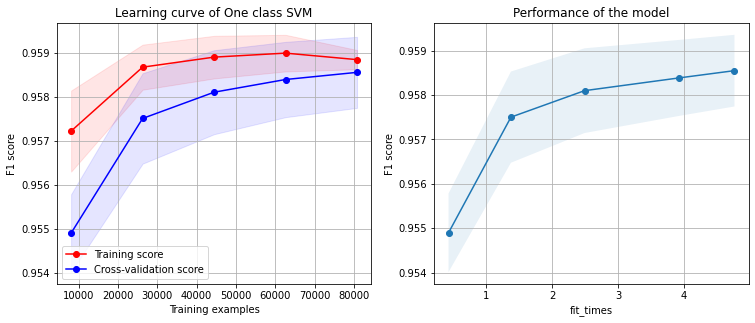

In [194]:
plot_learning_curve(one_class_svc_tuned, "One class SVM", ieee_atts_train_pca, oc_svm_target, cv=5)

We would have to fit once again since we did not save an instance for each config.

In [195]:
one_class_svc_tuned.fit(ieee_atts_train_pca, oc_svm_target)

OneClassSVM(gamma=0.5, nu=0.001)

And save it to a file

In [196]:
with open('one_class_svc_tuned.pickle', 'wb') as f:
    pickle.dump(one_class_svc_tuned, f)

In [33]:
with open('one_class_svc_tuned_gscv.pickle', 'wb') as f:
        pickle.dump(clf, f)

### 4.C.b Random Forest Classifier <a class="anchor" id="Random_Forest_Classifier_ieee"></a>

The last classifier that we will try will be once again Random Forest.

In [197]:
ieee_RF = RandomForestClassifier(random_state = 11)

We will first try it with the PCA transformation.

In [198]:
ieee_RF_f1_scores_pca = perform_skf(ieee_RF, ieee_atts_train_pca, ieee_target_train)

  0%|          | 0/5 [00:00<?, ?it/s]

In [199]:
print_f1_stats(ieee_RF_f1_scores_pca)

List of observed f1 scores: [0.5022502250225023, 0.5047575894879928, 0.49286043298019344, 0.522202486678508, 0.510158013544018]

Maximum F1-score: 52.2202486678508 %

Minimum F1-score: 49.286043298019344 %

Overall F1-score: 50.6445749542643 %


And now we will try with the LDA transformation.

In [252]:
print_f1_stats(perform_skf(ieee_RF, ieee_atts_train_lda, ieee_target_train))

  0%|          | 0/5 [00:00<?, ?it/s]

List of observed f1 scores: [0.9927099841521394, 0.9927146024707, 0.9936748893105629, 0.9949526813880126, 0.9940006315124724]

Maximum F1-score: 99.49526813880126 %

Minimum F1-score: 99.27099841521394 %

Overall F1-score: 99.36105577667774 %


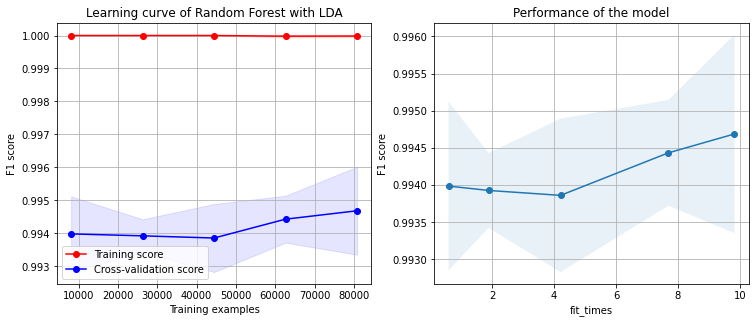

In [270]:
plot_learning_curve(ieee_RF, "Random Forest with LDA", ieee_atts_train_lda, ieee_target_train[27], cv=5)

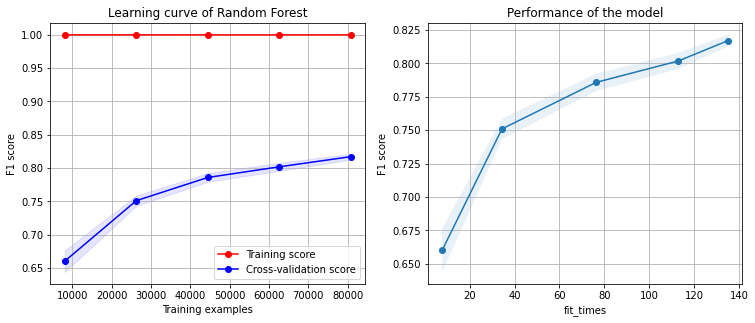

In [241]:
plot_learning_curve(ieee_RF, "Random Forest", ieee_atts_train, ieee_target_train[27], cv=5)

Results are a lot better. Lets look at our trees.

In [275]:
tree_depths = [estimator.tree_.max_depth for estimator in ieee_RF.estimators_]
print(tree_depths)

[15, 13, 15, 15, 15, 18, 15, 16, 18, 16, 13, 14, 14, 13, 12, 15, 14, 13, 12, 15, 14, 15, 14, 13, 15, 13, 14, 15, 18, 17, 14, 16, 15, 14, 18, 15, 14, 14, 14, 14, 16, 15, 16, 13, 14, 16, 16, 14, 14, 13, 14, 17, 14, 12, 17, 13, 15, 15, 15, 14, 13, 15, 15, 16, 16, 16, 15, 13, 13, 16, 15, 18, 19, 15, 18, 12, 14, 14, 13, 12, 18, 15, 13, 14, 13, 14, 18, 15, 15, 16, 14, 16, 13, 16, 16, 17, 16, 17, 15, 12]


The trees are still pretty deep and will focus on optimizing the fit times like we did earlier.

In [278]:
mean_tree_depth = int(np.mean(tree_depths))

In [289]:
ieee_parameters_rf = {
    'max_depth': [mean_tree_depth-7, mean_tree_depth-9, mean_tree_depth-4, mean_tree_depth-1],
    'min_samples_leaf': [1, 3, 4, 5],
    'min_samples_split': [4, 8, 10, 12],
    'n_estimators': [100, 200, 300]
}

In [290]:
%%time

ieee_RF_tuned = RandomForestClassifier(random_state=11)

clf = RandomizedSearchCV(ieee_RF_tuned, ieee_parameters_rf, n_iter = 60, cv = 4, scoring = 'f1', n_jobs = -1)
clf.fit(ieee_atts_train_lda, ieee_target_train[27])

#Or you can use the pretrained pipeline
# with open('random_forest_tuned.pickle', 'rb') as f:
#     clf = pickle.load(f)

#with open('ieee_random_forest_tuned.pickle', 'rb') as f:
#    clf = pickle.load(f)

Wall time: 8min 56s


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=11),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'max_depth': [7, 5, 10, 13],
                                        'min_samples_leaf': [1, 3, 4, 5],
                                        'min_samples_split': [4, 8, 10, 12],
                                        'n_estimators': [100, 200, 300]},
                   scoring='f1')

In [291]:
clf.best_score_

0.9967825130812051

In [292]:
ieee_RF_tuned = clf.best_estimator_

Lastly, lets save it.

In [218]:
with open('ieee_random_forest_rscv.pickle', 'wb') as f:
    pickle.dump(clf, f)

### 4.D Comparison <a class="anchor" id="Comparison_ieee"></a>

To test the models we will need to transform the test data like we did with the training data.

In [26]:
ieee_atts_test_pca = pd.DataFrame(pca_pipe.transform(ieee_atts_test))

In [45]:
ieee_atts_test_lda = linDA.transform(ieee_atts_test)

oc_svm_target_test = ieee_target_test.copy()
oc_svm_target_test[oc_svm_target_test == 1] = -1
oc_svm_target_test[oc_svm_target_test == 0] = 1

### OneClass SVM

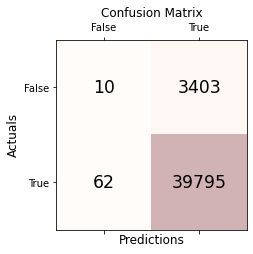

Wall time: 843 ms


In [46]:
%%time
one_class_svc_tuned_test_predictions = one_class_svc_tuned.predict(ieee_atts_test_pca)
plot_conf_matrix(oc_svm_target_test, one_class_svc_tuned_test_predictions)

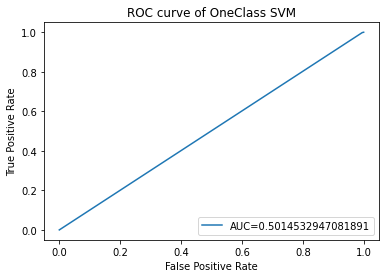

In [298]:
plot_roc_curve(oc_svm_target_test, one_class_svc_tuned_test_predictions, "OneClass SVM")

### Random Forest Classifier

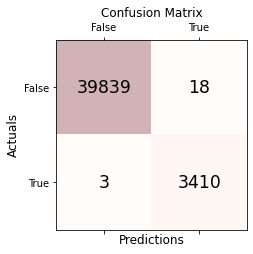

Wall time: 2.33 s


In [303]:
%%time
ieee_RF_tuned_test_predictions = ieee_RF_tuned.predict(ieee_atts_test_lda)
plot_conf_matrix(ieee_target_test, ieee_RF_tuned_test_predictions)

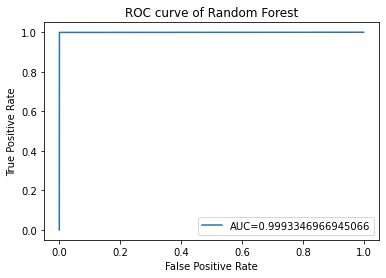

In [304]:
plot_roc_curve(ieee_target_test, ieee_RF_tuned_test_predictions, "Random Forest")

### LinDA

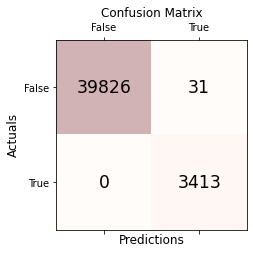

Wall time: 208 ms


In [49]:
%%time
linDA_test_predictions = linDA.predict(ieee_atts_test)
plot_conf_matrix(ieee_target_test, linDA_test_predictions)

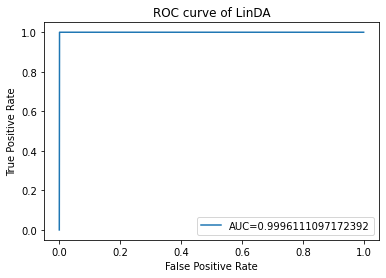

In [52]:
plot_roc_curve(ieee_target_test, linDA_test_predictions, "LinDA")

# <div class="alert alert-block alert-danger">5. Conclusion and future work </div> <a class="anchor" id="Conclusion and future work"></a>

In this notebook, we discussed the fraud-related problems the world is facing today. We also talked about these problems in terms of machine learning and the difficulties related to solving them.
<br>
<br>
Imbalanced datasets are tough to work with as they make some models and even metrics are not suitable. However, we do have ways to tackle that problem by undersampling or oversampling as appropriate with the data we are working with. And if that is not enough - we try different models.
<br>
<br>
Missing values are not an exclusive problem for this field and it is beneficial for every ML engineer to know how to deal with them. As we said, our opportunities are several, but our choice should be based on the type of data that is missing.
<br>
<br>
We explored, analyzed and modeled 2 datasets - both being about credit card fraud, but with different challenges along the way.
<br>
<br>
However, fraud detection expands beyond credit card scams and in the future email fraud/scam detection will be added to a new version of this notebook.

# Sources

https://www.fortinet.com/resources/cyberglossary/internet-fraud

https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc

https://jamesrledoux.com/code/imputation

https://machinelearningmastery.com/calculate-feature-importance-with-python/

https://machinelearningmastery.com/extreme-gradient-boosting-ensemble-in-python/

https://www.kdnuggets.com/2020/06/missing-values-dataset.html

https://stats.stackexchange.com/questions/421545/multiple-imputation-by-chained-equations-mice-explained

https://medium.com/analytics-vidhya/using-scikit-learns-iterative-imputer-694c3cca34de

https://www.youtube.com/watch?v=FgakZw6K1QQ